# L3: Image generation app 🎨

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [2]:
# import requests

# API_URL = "https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5"
# headers = { "Authorization": f"Bearer {hf_api_key}"}

# def query(payload):
# 	response = requests.post(API_URL, headers=headers, json=payload)
# 	return response.content

In [3]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL="https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5"):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return response.content

## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.

### How about running it locally?
The code would look very similar if you were running it locally instead of from an API.
```py
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

def get_completion(prompt):
    return pipeline(prompt).images[0]    
```

In [4]:
# import io
# from PIL import Image

# image_bytes = query({
# 	"inputs": "Beautiful korean girl",
# })
# image = Image.open(io.BytesIO(image_bytes))
# image.save("test.png")
# IPython.display.HTML(f'<img src="data:image/png;base64,{image}" />')



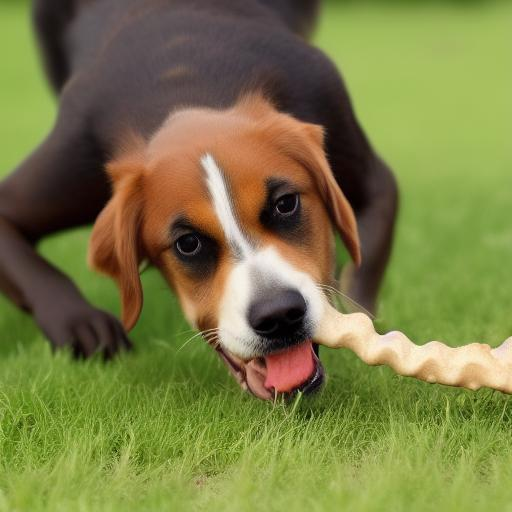

In [5]:
prompt = "dog eating a bone"



#result = get_completion(prompt)
#IPython.display.HTML(f'<img src="data:image/png;base64,{result.decode("utf-8")}" />')


result = get_completion(prompt)
# Convert the bytes object to a base64 encoded string
base64_encoded_result = base64.b64encode(result).decode("utf-8")
# Use the base64 encoded string directly in the HTML <img> tag
IPython.display.HTML(f'<img src="data:image/png;base64,{base64_encoded_result}" />')

## Generating with `gr.Interface()`

In [20]:
import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
# def base64_to_pil(img_base64):
#     base64_decoded = base64.b64decode(img_base64)
#     byte_stream = io.BytesIO(base64_decoded)
#     pil_image = Image.open(byte_stream)
#     return pil_image

def base64_to_pil(img_base64):
    # Ensure the encoded data is correctly padded
    img_base64 += b"=" * ((4 - len(img_base64) % 4) % 4)  # Use b"=" for bytes representation
    base64_decoded = base64.b64decode(img_base64)
    
    # Try opening the image
    try:
        image = Image.open(io.BytesIO(base64_decoded))
        return image
    except Exception as e:
        print("Error while opening the image:", e)
        return None


# def generate(prompt):
#     output = get_completion(prompt)
#     result_image = base64_to_pil(output)
#     return result_image


from IPython.display import display, Image as IPImage

def generate(prompt):
    output = get_completion(prompt)  # Assuming this function returns the base64 encoded image data
    
    # Check for the prefix in bytes form
    prefix_bytes = b"data:image/png;base64,"
    if output.startswith(prefix_bytes):
        output = output[len(prefix_bytes):]
    
    try:
        # Directly display the image bytes in Jupyter notebook using the aliased IPImage
        display(IPImage(data=output))
    except Exception as e:
        print("Error while displaying the image:", e)


gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

#demo.launch(share=True, server_port=int(os.environ['PORT1']))
demo.launch()

Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1392, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1326, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\components\image.py", line 304, in postprocess
    raise ValueError("Cannot process this value as an Image")
ValueError: Cannot process this value as an Image


In [13]:
demo.close()

Closing server running on port: 7861


## Building a more advanced interface


In [19]:
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    # Ensure the encoded data is correctly padded
    img_base64 += b"=" * ((4 - len(img_base64) % 4) % 4)  # Use b"=" for bytes representation
    base64_decoded = base64.b64decode(img_base64)
    
    # Try opening the image
    try:
        image = Image.open(io.BytesIO(base64_decoded))
        return image
    except Exception as e:
        print("Error while opening the image:", e)
        return None

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch()

Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1389, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1094, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\anyio\_backends\_asyncio.py", 

In [22]:
demo.close()

Closing server running on port: 7861


## `gr.Blocks()` to the rescue!

In [24]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch()

Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [25]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch()

C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\utils.py:833: UserWarning: Expected 1 arguments for function <function generate at 0x00000256E6D70F40>, received 6.
  warnings.warn(
C:\Users\ocalld15\AppData\Roaming\Python\Python311\site-packages\gradio\utils.py:841: UserWarning: Expected maximum 1 arguments for function <function generate at 0x00000256E6D70F40>, received 6.
  warnings.warn(


Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7861
Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
